# <span style='color:blue'> <center>Supervised Learning</center> </span>
## **Chapter 1.** Classification
#### by **Ivan Alducin**
<p><img src="https://preview.redd.it/rfgtsej8fhv71.jpg?auto=webp&s=99a5d000ff2baaac79a8d15c7135c3677f105159" width="1000"></p>

## Exploratory Data Analysis
<p>Vamos a trabajar con el conjunto de datos de <code>Heart Attack</code>, el objetivo es predecir bajo que escenerario es más probable que un paciente pueda tener un ataque al corazón  Un experto en medicina cardiovasuclar puede predecir esto sin hacer uso de <i>Machine Learning</i>, pero probablemente no instantáneamente, ¡y ciertamente no si estamos tratando con cientos o miles de muestras!.
    
A continuación una breve explicación de las variables del dataset:
    
- <b>age:</b> Age of the patient
- <b>sex:</b> Sex of the patient
- <b>cp:</b> Chest pain type ~ 0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic
- <b>trtbps:</b> Resting blood pressure (in mm Hg)
- <b>chol:</b> Cholestoral in mg/dl fetched via BMI sensor
- <b>fbs:</b> (fasting blood sugar > 120 mg/dl) ~ 1 = True, 0 = False
- <b>restecg:</b> Resting electrocardiographic results ~ 0 = Normal, 1 = ST-T wave normality, 2 = Left ventricular hypertrophy
- <b>thalachh:</b> Maximum heart rate achieved
- <b>oldpeak:</b> Previous peak
- <b>slp:</b> Slope
- <b>caa:</b> Number of major vessels
- <b>thall:</b> Thalium Stress Test result ~ (0,3)
- <b>exng:</b> Exercise induced angina ~ 1 = Yes, 0 = No
- <b>output:</b>  Target variable</p>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('Heart Attack.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [3]:
#!pip install dataprep

In [4]:
# Archivo Heart Attack.csv - ¿Cuales son los factores que pueden incrementar o disminuir la probabilidad de un ataque al corazón?
from dataprep.eda import create_report

create_report(df)

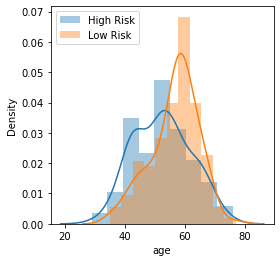

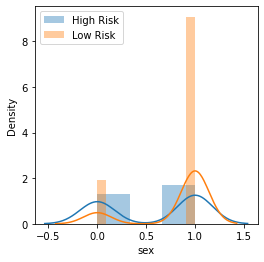

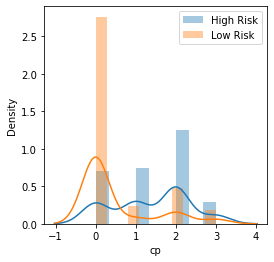

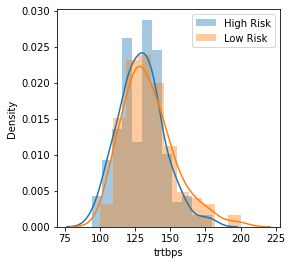

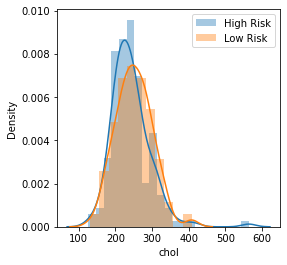

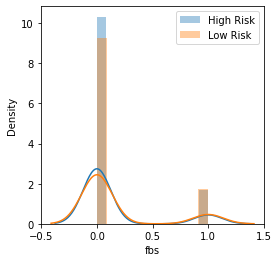

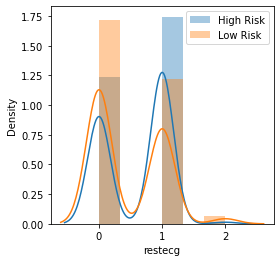

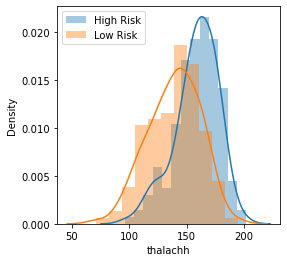

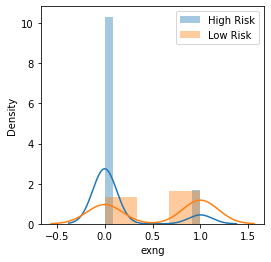

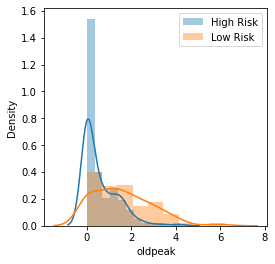

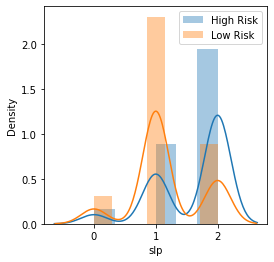

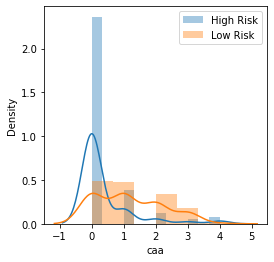

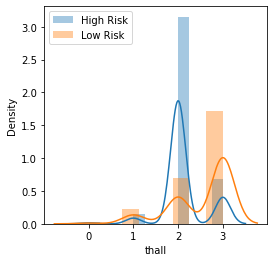

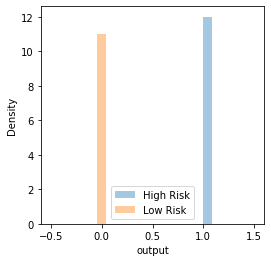

In [5]:
risk = df[df['output'] == 1]
safe = df[df['output'] == 0]

for col in df.select_dtypes(include=['float64','int64']):
    plt.figure(figsize=(4,4))
    sns.distplot(risk[col],label='High Risk')
    sns.distplot(safe[col],label='Low Risk')
    plt.legend()
    plt.show()

<Figure size 288x288 with 0 Axes>

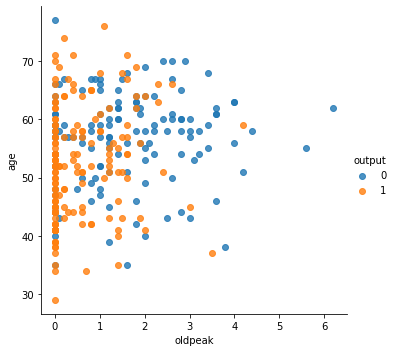

<Figure size 288x288 with 0 Axes>

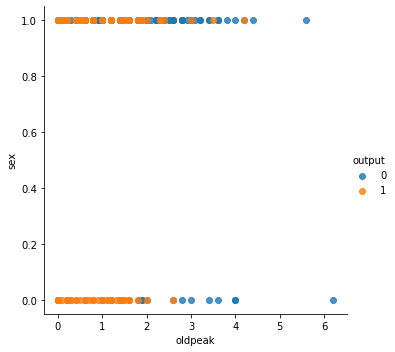

<Figure size 288x288 with 0 Axes>

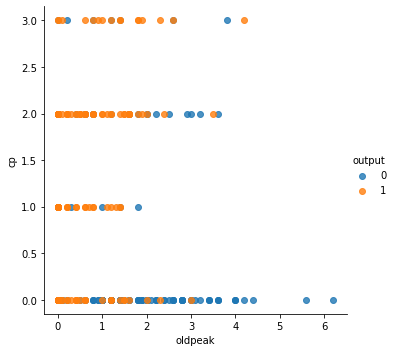

<Figure size 288x288 with 0 Axes>

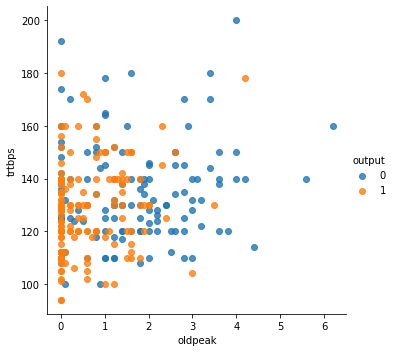

<Figure size 288x288 with 0 Axes>

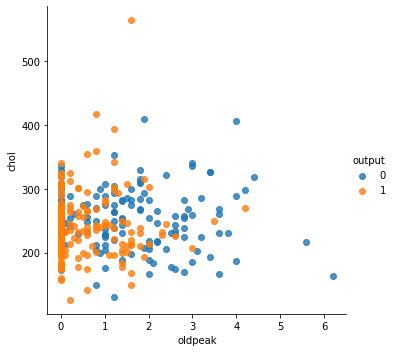

<Figure size 288x288 with 0 Axes>

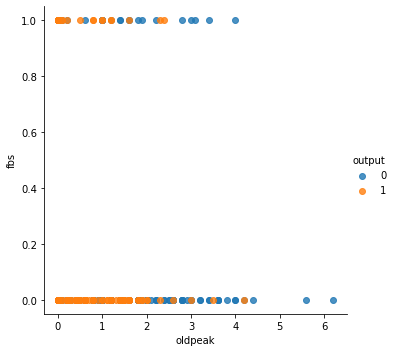

<Figure size 288x288 with 0 Axes>

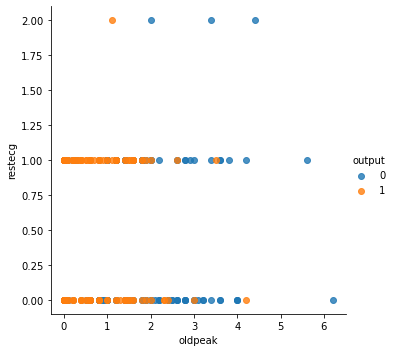

<Figure size 288x288 with 0 Axes>

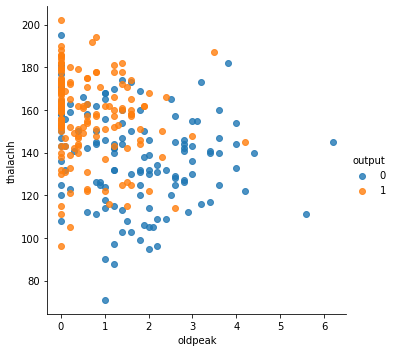

<Figure size 288x288 with 0 Axes>

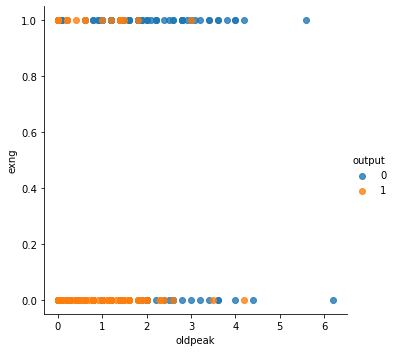

<Figure size 288x288 with 0 Axes>

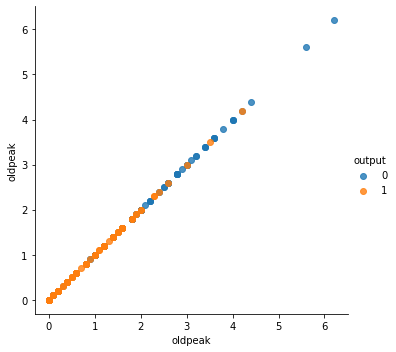

<Figure size 288x288 with 0 Axes>

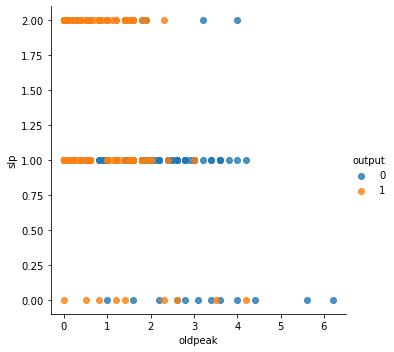

<Figure size 288x288 with 0 Axes>

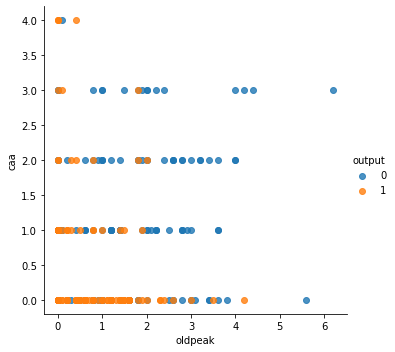

<Figure size 288x288 with 0 Axes>

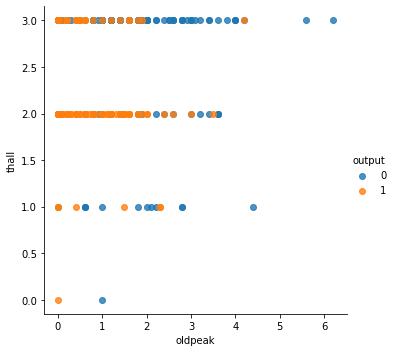

<Figure size 288x288 with 0 Axes>

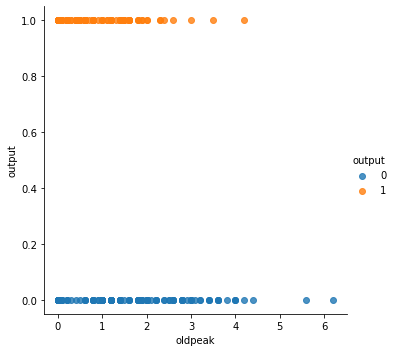

In [6]:
for col in df.select_dtypes(include=['float64','int64']):
    plt.figure(figsize=(4,4))
    sns.lmplot(x='oldpeak', y=col, hue='output', data=df, fit_reg=False)

## k-Nearest Neighbors
<p>Habiendo hecho un Análisis Exploratorio de los factores que pueden o no tener más posibilidad de un ataque al corazón, es hora de crear tu primer clasificador!!! usando el algoritmo de k-NN.
    
<b>Nota</b>: es importante garantizar que los datos esten en el formato requerido por la librería de <code>scikit-learn</code>. La información debe estar en una matriz en la que cada columna sea una variable y cada fila una observación diferente, en este caso, el registro de análisis clinico por paciente. Y la variable objetivo debe ser una sola columna con el mismo número de observaciones.</p>

In [8]:
# Importa la librería para un clasificador k-NN
from sklearn.neighbors import KNeighborsClassifier 

# Crea dos arreglos "X", "y" que contengan los valores de las variables independientes y la variable objetivo
X = df.drop('output', axis=1)
y = df['output']

# Crea un clasificador k-NN con 6 vecinos
knn = KNeighborsClassifier(n_neighbors = 6)

# Ajusta el clasificador a las variables
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=6)

## Predicción
<p>Una vez que entrenamos al clasificador k-NN, ahora lo podemos usar para predecir un nuevo registro. Para este caso,  no hay datos sin clasificar disponibles ya que todos se usaron para entrenar al modelo. Para poder calcular una predicción, vamos a usar el método <code>.predict()</code> pero, para esto vamos a simular una observación completamente nueva</p>

In [8]:
# Crea un arreglo simulando una observación
X_new = np.array([[57,0,0,125,354,0,1,173,1,0.6,2,0,20]])

# Predice la clasificación para el arreglo que creaste
y_new_pred = knn.predict(X_new)
print("Prediction: {}".format(y_new_pred))

Prediction: [1]


## Reconocimiento de digitos
<p>Hasta ahora, solo hemos realizado una clasificación binaria, ya que la variable objetivo tenía dos resultados posibles. En los siguientes ejercicios, trabajarás con el conjunto de datos de reconocimiento de dígitos MNIST, que tiene 10 clases, ¡los dígitos del 0 al 9! Una versión reducida del conjunto de datos <a href="http://yann.lecun.com/exdb/mnist/">MNIST</a> es uno de los conjuntos de datos incluidos en <code>scikit-learn</code>

Cada muestra de este conjunto de datos es una imagen de 8x8 que representa un dígito escrito a mano. Cada píxel está representado por un número entero en el rango de 0 a 16, lo que indica niveles variables de negro. Recuerde que los conjuntos de datos integrados de scikit-learn son del tipo <code>Bunch</code>, que son objetos similares a diccionarios.  Por otro lado, la clave <i>data</i> contiene la matriz de características, es decir, las imágenes como una matriz plana de 64 píxeles.</p>

<p><img src="https://miro.medium.com/max/1400/1*hVdoiW35FXUE-fZ0HI30Tw.jpeg" width="350"></p>

In [1]:
# Importa matplotlib.pytplot
from sklearn import datasets

# Importa el dataset "digits" el cual es un conjunto de datos que se encuentra dentro de la librería sklearn
digits = datasets.load_digits()

# Explora los componentes clave (keys) y la descripcion del dataset (DESCR)
print(digits.keys())
print(digits.DESCR)

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are di

In [10]:
# Explora los componentes clave (dict keys) 
print(digits.data.shape)
print(digits.images)

(1797, 64)
[[[ 0.  0.  5. ...  1.  0.  0.]
  [ 0.  0. 13. ... 15.  5.  0.]
  [ 0.  3. 15. ... 11.  8.  0.]
  ...
  [ 0.  4. 11. ... 12.  7.  0.]
  [ 0.  2. 14. ... 12.  0.  0.]
  [ 0.  0.  6. ...  0.  0.  0.]]

 [[ 0.  0.  0. ...  5.  0.  0.]
  [ 0.  0.  0. ...  9.  0.  0.]
  [ 0.  0.  3. ...  6.  0.  0.]
  ...
  [ 0.  0.  1. ...  6.  0.  0.]
  [ 0.  0.  1. ...  6.  0.  0.]
  [ 0.  0.  0. ... 10.  0.  0.]]

 [[ 0.  0.  0. ... 12.  0.  0.]
  [ 0.  0.  3. ... 14.  0.  0.]
  [ 0.  0.  8. ... 16.  0.  0.]
  ...
  [ 0.  9. 16. ...  0.  0.  0.]
  [ 0.  3. 13. ... 11.  5.  0.]
  [ 0.  0.  0. ... 16.  9.  0.]]

 ...

 [[ 0.  0.  1. ...  1.  0.  0.]
  [ 0.  0. 13. ...  2.  1.  0.]
  [ 0.  0. 16. ... 16.  5.  0.]
  ...
  [ 0.  0. 16. ... 15.  0.  0.]
  [ 0.  0. 15. ... 16.  0.  0.]
  [ 0.  0.  2. ...  6.  0.  0.]]

 [[ 0.  0.  2. ...  0.  0.  0.]
  [ 0.  0. 14. ... 15.  1.  0.]
  [ 0.  4. 16. ... 16.  7.  0.]
  ...
  [ 0.  0.  0. ... 16.  2.  0.]
  [ 0.  0.  4. ... 16.  2.  0.]
  [ 0.  0.  5. ..

In [11]:
digits.images[1016]

array([[ 0.,  0.,  9., 16.,  7.,  0.,  0.,  0.],
       [ 0.,  0., 14., 13., 16.,  2.,  0.,  0.],
       [ 0.,  0.,  7.,  9., 15.,  8.,  0.,  0.],
       [ 0.,  0.,  0.,  1., 13.,  9.,  0.,  0.],
       [ 0.,  0.,  0.,  0., 14.,  7.,  0.,  0.],
       [ 0.,  0.,  0.,  4., 16.,  5.,  0.,  0.],
       [ 0.,  0.,  7., 16., 16.,  8.,  6.,  0.],
       [ 0.,  0.,  9., 15., 12., 16., 16.,  9.]])

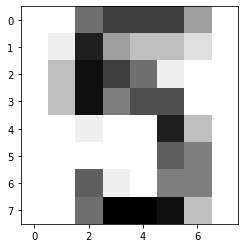

In [12]:
# Vamos a imprimir un digito
plt.imshow(digits.images[1010], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [13]:
digits.images[0].shape

(8, 8)

## Train/Test
<p>Una de las principales diferencias entre la Estadística Clasica y el <i>Machine Learning</i> es la división del conjunto de datos en conjuntos de entrenamiento y prueba, con el objetivo de medir y cuantificar la precisión y el nivel de error en los datos que de alguna manera el modelo <i>"No ha visto"</i>. A continuación crearemos nuestros conjuntos de entrenamiento y prueba con el método <code>train_test_split</code> y mediremos cual es el nivel de precisión de nuestro modelo. El objetivo es <b>predecir cual es el digito dada una imagen</b>!!!. Para lo cual entrenaremos un clasificador <i>k-NN</i> a los datos de entrenamiento y luego calcularemos su precisión usando el método <code>accuracy_score()</code> en los datos de prueba ¿Como crees que en un modelo de Clasificación se calcule su precisión?. Parece bastante dificil, pero no lo es ;)</p>

In [6]:
# Importa la librería para entrenamiento y prueba de datos y la librería para calcular la precisión
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score

In [9]:
# Crea los arreglos para las variables independientes y la variable objetivo
X = digits.data
y = digits.target

# Divide los arreglos anteriores en conjuntos de training y test en una proporcion del 70/30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1)

# Crea un clasificador k-NN con 7 vecinos
knn = KNeighborsClassifier(n_neighbors = 8)

# Ajusta (Entrenamiento) el clasificador en el conjunto de entrenamiento
knn.fit(X_train, y_train)

# Calcular las predicciones sobre el conjunto de prueba
y_pred = knn.predict(X_test)

# Verificar la precisión del modelo 
print(accuracy_score(y_test, y_pred))

0.9925925925925926


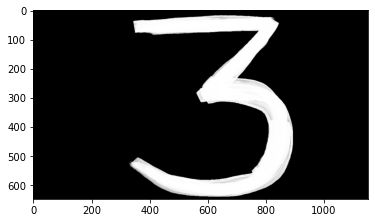

In [18]:
img = plt.imread('image.jpg')
plt.imshow(img)

In [4]:
from PIL import Image
image = Image.open('picture.jpg')
new_image = image.resize((8, 8))
pixels = np.asarray(new_image)

In [19]:
pixels

array([[[  0,   0,   0],
        [  0,   0,   0],
        [ 77,  77,  77],
        [159, 159, 159],
        [166, 166, 166],
        [138, 138, 138],
        [  1,   1,   1],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [ 16,  16,  16],
        [ 27,  27,  27],
        [ 42,  42,  42],
        [103, 103, 103],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [133, 133, 133],
        [ 50,  50,  50],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [ 18,  18,  18],
        [206, 206, 206],
        [171, 171, 171],
        [  5,   5,   5],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  1,   1,   1],
        [ 11,  11,  11],
        [126, 126, 126],
        [ 48,  48,  48],
        [  0,   0

In [11]:
pixels.transpose(2, 0, 1)

array([[[  0,   0,  77, 159, 166, 138,   1,   0],
        [  0,   0,  16,  27,  42, 103,   0,   0],
        [  0,   0,   0,   0, 133,  50,   0,   0],
        [  0,   0,   0,  18, 206, 171,   5,   0],
        [  0,   0,   0,   1,  11, 126,  48,   0],
        [  0,   0,   0,   0,   0,  99,  66,   0],
        [  0,   0,  68,  34,  12, 156,  40,   0],
        [  0,   0,  37, 167, 187, 130,   2,   0]],

       [[  0,   0,  77, 159, 166, 138,   1,   0],
        [  0,   0,  16,  27,  42, 103,   0,   0],
        [  0,   0,   0,   0, 133,  50,   0,   0],
        [  0,   0,   0,  18, 206, 171,   5,   0],
        [  0,   0,   0,   1,  11, 126,  48,   0],
        [  0,   0,   0,   0,   0,  99,  66,   0],
        [  0,   0,  68,  34,  12, 156,  40,   0],
        [  0,   0,  37, 167, 187, 130,   2,   0]],

       [[  0,   0,  77, 159, 166, 138,   1,   0],
        [  0,   0,  16,  27,  42, 103,   0,   0],
        [  0,   0,   0,   0, 133,  50,   0,   0],
        [  0,   0,   0,  18, 206, 171,   5,   

In [14]:
arr = pixels.transpose(2, 0, 1).reshape(-1, pixels.shape[1])[0:8]
arr = pixels.transpose(2, 0, 1).reshape(-1, pixels.shape[1])
arr

array([[  0,   0,  77, 159, 166, 138,   1,   0],
       [  0,   0,  16,  27,  42, 103,   0,   0],
       [  0,   0,   0,   0, 133,  50,   0,   0],
       [  0,   0,   0,  18, 206, 171,   5,   0],
       [  0,   0,   0,   1,  11, 126,  48,   0],
       [  0,   0,   0,   0,   0,  99,  66,   0],
       [  0,   0,  68,  34,  12, 156,  40,   0],
       [  0,   0,  37, 167, 187, 130,   2,   0],
       [  0,   0,  77, 159, 166, 138,   1,   0],
       [  0,   0,  16,  27,  42, 103,   0,   0],
       [  0,   0,   0,   0, 133,  50,   0,   0],
       [  0,   0,   0,  18, 206, 171,   5,   0],
       [  0,   0,   0,   1,  11, 126,  48,   0],
       [  0,   0,   0,   0,   0,  99,  66,   0],
       [  0,   0,  68,  34,  12, 156,  40,   0],
       [  0,   0,  37, 167, 187, 130,   2,   0],
       [  0,   0,  77, 159, 166, 138,   1,   0],
       [  0,   0,  16,  27,  42, 103,   0,   0],
       [  0,   0,   0,   0, 133,  50,   0,   0],
       [  0,   0,   0,  18, 206, 171,   5,   0],
       [  0,   0,   

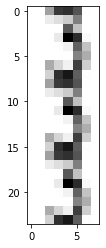

In [15]:
plt.imshow(arr, cmap=plt.cm.gray_r, interpolation='nearest')

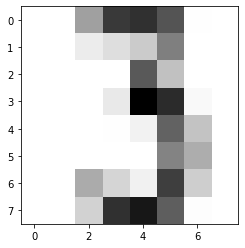

In [21]:
plt.imshow(arr, cmap=plt.cm.gray_r, interpolation='nearest')

In [23]:
arr = arr.ravel().reshape(1, -1)
my_picture.shape

(1, 64)

In [24]:
print("El número es:", knn.predict(my_picture))

El número es: [3]


## Overfit and Underfit
<p>¿Cual es mi numero ideal para elegir el parametro <i>k</i>? Vamos a calcular los valores de precisión para los conjuntos e entrenamiento y prueba para una rango de valores k. Al observar cómo difieren estos valores podremos observar cual es el mejor parametro sin caer en un <i>Overfit</i> o un <i>Underfit</i>.</p>

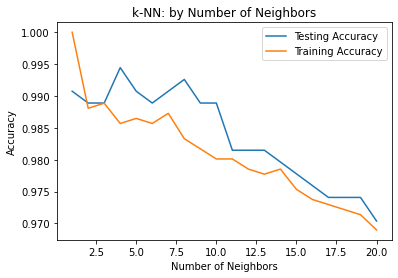

In [17]:
# Configuración de arreglos iniciales
neighbors = np.arange(1, 21)
train_accuracy = []
test_accuracy = []

# Loop para diferentes valores de k
for k in neighbors:
    # Clasificador k-NN para el parametro k
    knn =  KNeighborsClassifier(n_neighbors=k)

    # Ajuste del clasificador al dataset de entrenamiento
    knn.fit(X_train, y_train)
    
    # Calculo de precision sobre el dataset de entrenamiento
    train_accuracy.append(knn.score(X_train, y_train))

    # Calculo de precision sobre el dataset de prueba
    test_accuracy.append(knn.score(X_test, y_test))

# Grafico para encontrar un valor optimo de k
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.title('k-NN: by Number of Neighbors')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.legend()
plt.show()